In [2]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%reload_ext autoreload

In [19]:
from FittedModels.Models.FlowModel import FlowModel
from AIS_train.train_AIS import AIS_trainer
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils.plotting_utils import plot_history, plot_distributions, plot_samples
import matplotlib.pyplot as plt
import torch
from TargetDistributions.MoG import MoG
from Utils.plotting_utils import plot_func2D, plot_distribution
from Utils.numerical_utils import MC_estimate_true_expectation
from Utils.numerical_utils import quadratic_function as expectation_function
torch.set_default_dtype(torch.float64)

def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples(*args, **kwargs)
    plt.show()

tensor(47.9914)


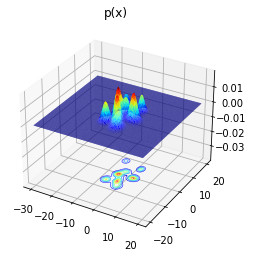

In [6]:
torch.manual_seed(2)
epochs = 500
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=10, min_cov=1, loc_scaling=5)
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))
print(true_expectation)
if dim == 2:
    fig = plot_distribution(target, bounds=[[-30, 20], [-20, 20]])

In [7]:
n_samples_expectation = int(1e4)
n_samples=int(1e4)

In [8]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=5.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=10, n_steps_transition_operator=3,
                    step_size=1.0, transition_operator="HMC", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-3)

In [9]:
expectation_before, info_dict_before = tester.AIS_train.calculate_expectation(n_samples_expectation,
                                                                    expectation_function=expectation_function)
print(info_dict_before['effective_sample_size'] / n_samples_expectation)

tensor(0.6133, device='cuda:0', grad_fn=<DivBackward0>)


  0%|          | 0/100 [00:00<?, ?it/s]

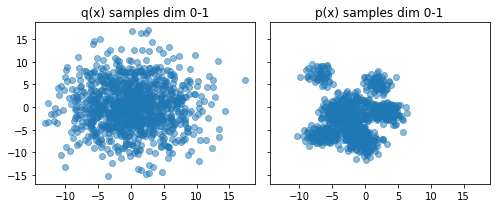

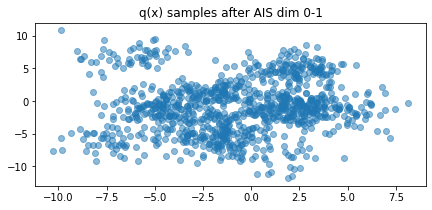

loss: 4.9558202370876625,   log_p_x_post_AIS -5.395490992074081, ESS 0.6761283848392267:  20%|██        | 20/100 [03:36<13:37, 10.22s/it]

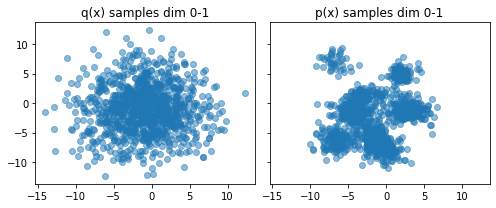

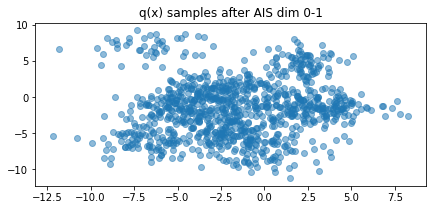

loss: 4.96005187498499,   log_p_x_post_AIS -5.301700248502697, ESS 0.7510875794682638:  40%|████      | 40/100 [07:01<10:10, 10.18s/it]  

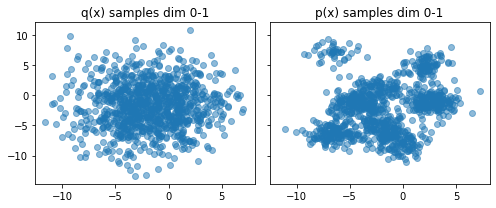

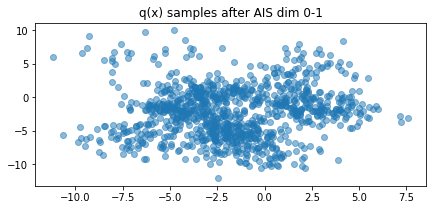

loss: 4.751481922299418,   log_p_x_post_AIS -5.272758185539444, ESS 0.6899697067137825:  60%|██████    | 60/100 [10:29<06:51, 10.29s/it] 

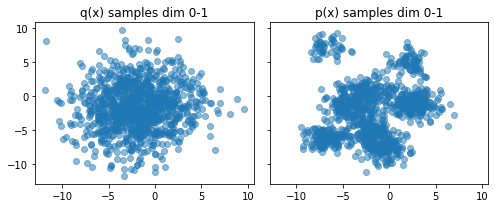

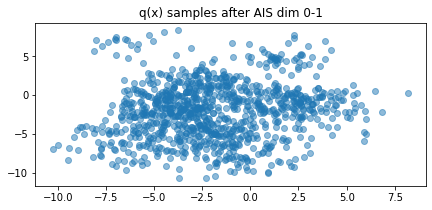

loss: 4.891649365917323,   log_p_x_post_AIS -5.340791304253999, ESS 0.7083546548067767:  80%|████████  | 80/100 [13:54<03:22, 10.14s/it]  

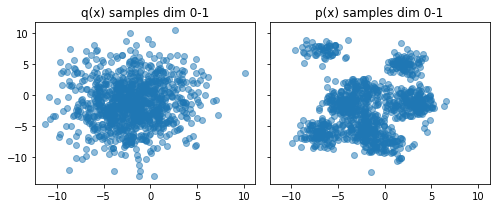

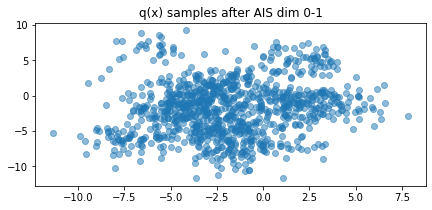

loss: 4.805904330362925,   log_p_x_post_AIS -5.2794914324498, ESS 0.6987440908593145: 100%|██████████| 100/100 [17:02<00:00, 10.23s/it]  


In [10]:
history = tester.train(100, batch_size=int(1e3), intermediate_plots=True, n_plots=5, plotting_func=plotter)

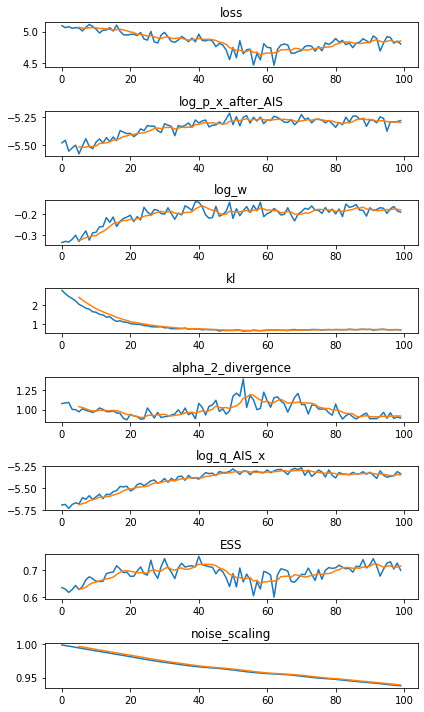

In [11]:
plot_history(history)

# Small weighting of likelihood after

In [30]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=5.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=10, n_steps_transition_operator=3,
                    step_size=1.0, transition_operator="HMC", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-3)

In [34]:
tester.train_AIS_params

True

In [31]:
# if we want to change weighting of log prob term
tester.log_prob_annealed_scaling_factor = torch.tensor(0.1)
tester.to("cuda")

  0%|          | 0/200 [00:00<?, ?it/s]

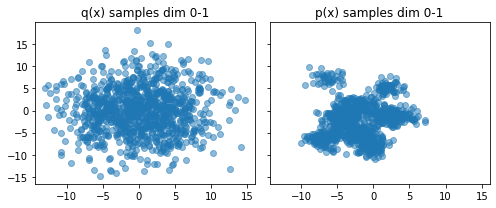

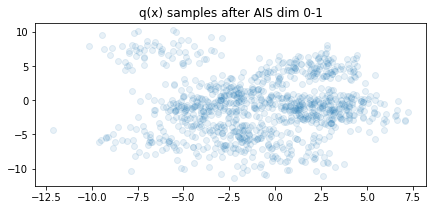

loss: 0.1557252328601978,   log_p_x_post_AIS -5.40196339098131, ESS 0.7490824468450689:  20%|██        | 40/200 [06:47<26:32,  9.95s/it]    

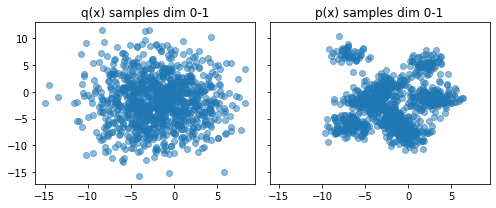

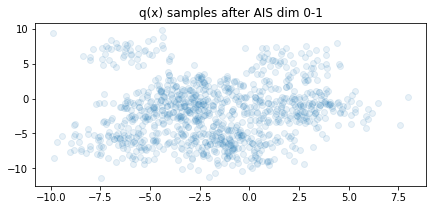

loss: 0.13553402611454737,   log_p_x_post_AIS -5.311849126590765, ESS 0.7484794831420507:  40%|████      | 80/200 [13:21<19:10,  9.59s/it]

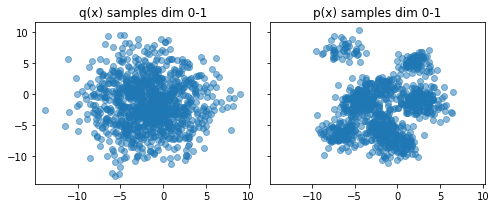

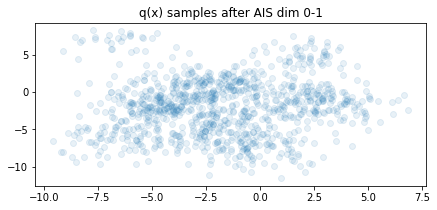

loss: 0.0487294829758004,   log_p_x_post_AIS -5.290428766898304, ESS 0.7198990003624234:  60%|██████    | 120/200 [19:53<12:38,  9.48s/it]   

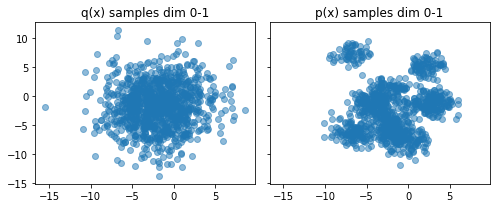

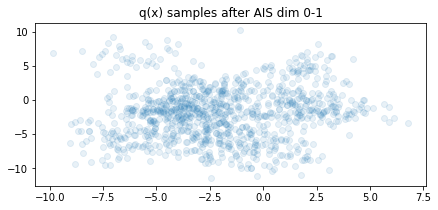

loss: 0.05367238675282493,   log_p_x_post_AIS -5.2932527583477835, ESS 0.7239494814044372:  80%|████████  | 160/200 [26:18<06:38,  9.96s/it] 

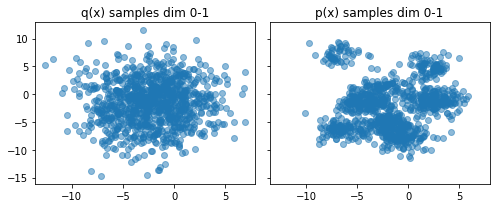

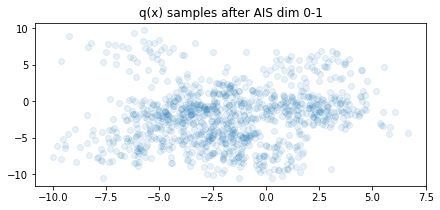

loss: 0.028671080136409344,   log_p_x_post_AIS -5.250175483252907, ESS 0.7119942093716617: 100%|██████████| 200/200 [32:56<00:00,  9.88s/it] 


In [32]:
history = tester.train(200, batch_size=int(1e3), intermediate_plots=True, n_plots=5, plotting_func=plotter)

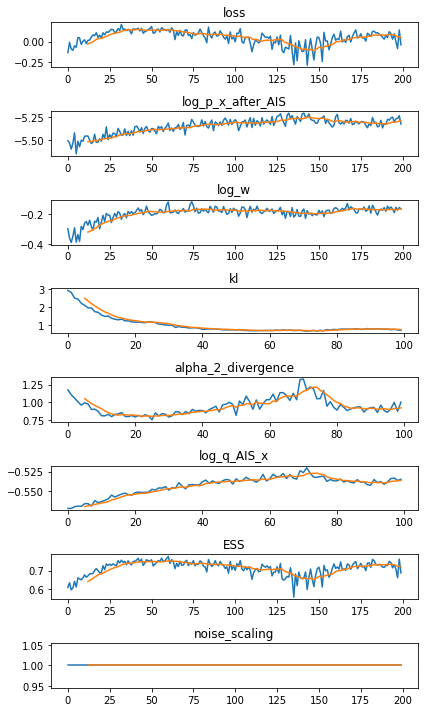

In [33]:
plot_history(history)